In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime, timedelta
import random

In [2]:
# Load the dataset
data = pd.read_csv('data (1).csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   duration          100 non-null    float64
 3   energy            100 non-null    float64
 4   key               100 non-null    int64  
 5   loudness          100 non-null    float64
 6   mode              100 non-null    int64  
 7   speechiness       100 non-null    float64
 8   acousticness      100 non-null    float64
 9   instrumentalness  100 non-null    float64
 10  liveness          100 non-null    float64
 11  valence           100 non-null    float64
 12  tempo             100 non-null    float64
 13  danceability      100 non-null    float64
 14  repeated_plays    100 non-null    int64  
 15  timestamp         100 non-null    object 
dtypes: float64(10), int64(3), object(3)
memory us

In [16]:
data.head()

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,repeated_plays,timestamp,month
0,4ZtFanR9U6ndgddUvNcjcG,Good 4 U Olivia Rodrigo,-0.471500,0.456013,1.037768,0.629600,0.886405,1.159703,0.073163,-0.320070,-0.685478,0.722094,1.564684,-0.672180,1,2024-06-29 08:00:00,6
1,5fxyZf6m2xHeSrOzUfcJrq,Stay The Kid LAROI & Justin Bieber,-1.197885,-0.487669,0.775042,-1.929258,0.886405,-0.244539,0.230493,3.610481,-0.461556,-0.268084,1.672467,-0.664262,0,2024-06-29 08:00:00,6
2,5nujrmhLynf4yMoMtj8AQF,Levitating Dua Lipa feat. DaBaby,-0.026996,1.417613,0.249590,1.145807,-1.128152,-0.226820,-1.093115,-0.320070,-0.841598,1.682651,-0.640333,0.428326,1,2024-06-29 09:20:00,6
3,4iJyoBOLtHqaGxP12qzhQI,Peaches Justin Bieber feat. Daniel Caesar & Gi...,-0.113728,0.647139,-1.326767,0.162673,0.886405,0.642894,0.023104,-0.320070,2.304014,-0.225769,-1.086743,0.230394,0,2024-06-29 10:20:00,6
4,1SC5rEoYDGUK4NfG82494W,Montero (Call Me By Your Name) Lil Nas X,-1.197885,-0.505587,0.775042,-0.060729,-1.128152,2.134255,-0.077015,-0.320070,2.170196,0.815187,1.973372,-0.434660,1,2024-06-29 11:20:00,6


In [36]:
# Data preprocessing
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['month'] = data['timestamp'].dt.month

features = ['duration', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo', 'danceability']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])


In [19]:
# Splitting the data
X = data[features]
y = data['repeated_plays']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.27478975416666673


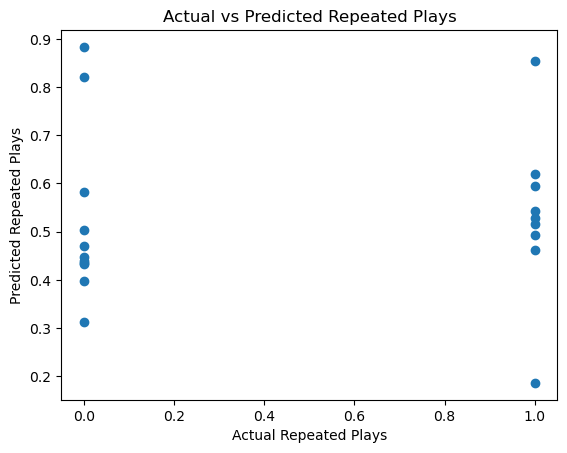

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Repeated Plays')
plt.ylabel('Predicted Repeated Plays')
plt.title('Actual vs Predicted Repeated Plays')
plt.show()

In [23]:
# Set up Spotify API credentials
client_id = "ddcb1546db454508af5cc833be559952"
client_secret = "adaeeaf215124e3a8c46373486f0b84f"
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [24]:
def recommend_music(seed_track):
    # Get the track ID of the seed track
    results = sp.search(q=seed_track, type='track', limit=1)
    seed_track_id = results['tracks']['items'][0]['id']
    
    # Get recommended tracks based on the seed track
    recommendations = sp.recommendations(seed_tracks=[seed_track_id])
    
    # Extract the recommended track names
    recommended_tracks = [track['name'] for track in recommendations['tracks']]
    
    return recommended_tracks

In [25]:
# Example usage
seed_track = "Good 4 U Olivia Rodrigo"  
recommended_tracks = recommend_music(seed_track)
print("Recommended tracks:")
for track in recommended_tracks:
    print(track)

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


Recommended tracks:
The Sweet Escape
Love Me Like You
Little Bit of Love
Mercy
Cool for the Summer
Bite Me
that way
Espresso
positions
SNAP
Light Switch
Dance The Night - From Barbie The Album
Monster (Shawn Mendes & Justin Bieber)
she's all i wanna be
OUT OUT (feat. Charli XCX & Saweetie)
happier
motive (with Doja Cat)
2 Be Loved (Am I Ready)
LUNCH
Deal With It (feat. Kelis)


In [26]:
# Example usage
seed_track = "Blinding Lights"  
recommended_tracks = recommend_music(seed_track)
print("Recommended tracks:")
for track in recommended_tracks:
    print(track)

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


Recommended tracks:
You Need To Calm Down
Dusk Till Dawn (feat. Sia) - Radio Edit
Who Do You Love
Psycho (feat. Ty Dolla $ign)
Solo (feat. Demi Lovato)
thank u, next
Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mustard) - Remix
Bad Liar
Just the Way You Are
bad guy
High Hopes
Blinding Lights (with ROSALÍA) - Remix
Get Lucky (Radio Edit) [feat. Pharrell Williams and Nile Rodgers]
Calm Down (with Selena Gomez)
I Don’t Wanna Live Forever (Fifty Shades Darker)
SICKO MODE
Hollywood's Bleeding
New Rules
fuck, i'm lonely
What A Man Gotta Do


In [27]:
# Generate 100 timestamps within a timeframe
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 1, 31)

timestamps = [start_date + timedelta(days=random.randint(0, 30),
                                     hours=random.randint(0, 23),
                                     minutes=random.randint(0, 59),
                                     seconds=random.randint(0, 59))
              for _ in range(100)]

# Create a DataFrame with timestamps
df_timestamps = pd.DataFrame({'timestamp': timestamps})
# Display the DataFrame
print(df_timestamps)

             timestamp
0  2024-01-31 23:17:21
1  2024-01-15 12:43:28
2  2024-01-01 13:55:15
3  2024-01-12 21:12:03
4  2024-01-05 21:38:50
..                 ...
95 2024-01-05 14:00:37
96 2024-01-13 05:54:15
97 2024-01-26 09:48:26
98 2024-01-10 15:08:49
99 2024-01-17 02:53:24

[100 rows x 1 columns]
